In [1]:
%matplotlib inline
import pandas as pd
import datetime
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('IceCreamData.csv', engine='python')

FileNotFoundError: [Errno 2] No such file or directory: 'IceCreamData.csv'

In [4]:
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [11]:
X=df["Temperature"].values.reshape(-1,1)
y=df["Revenue"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [17]:
len(X_train)

335

In [18]:
m = LinearRegression()
m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
from sklearn.metrics import mean_squared_error

In [22]:
y_pred=m.predict(X_test)

In [25]:
mse=mean_squared_error(y_test, y_pred)

In [26]:
import math
math.sqrt(mse)

24.75022537830132

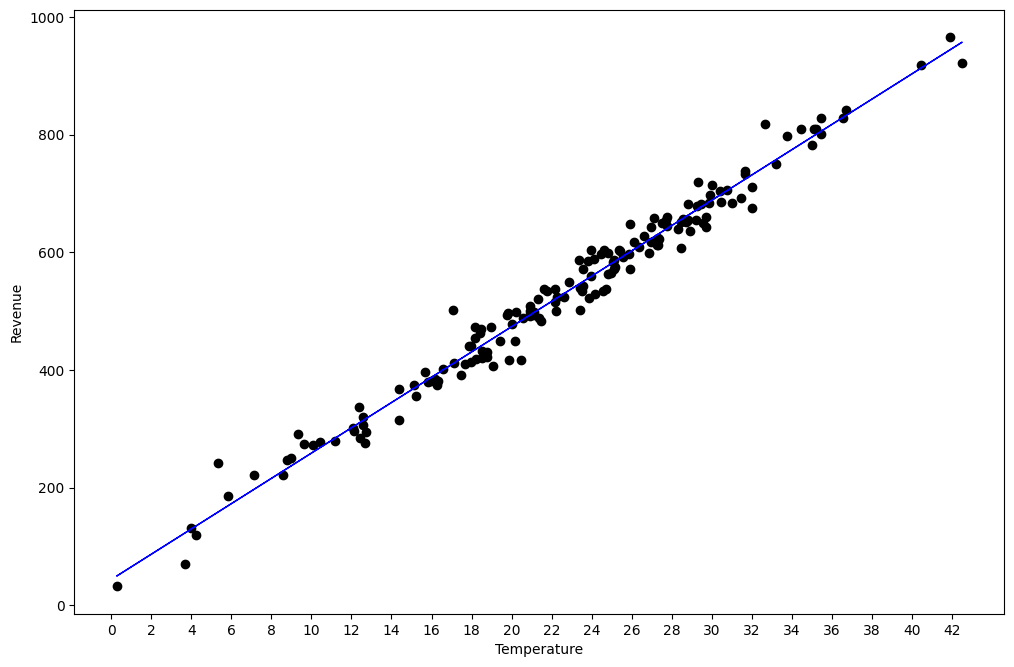

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.xticks([x for x in range(0,math.ceil(max(X_test)),2)])
plt.yticks()
plt.show()

In [30]:
import pickle
with open("model.pkl", "wb") as f:
      pickle.dump(m, f)

In [34]:
import numpy as np
with open("model.pkl", "rb") as f:
    m=pickle.load(f)
    r=m.predict(np.array([22]).reshape(-1,1))

In [35]:
r

array([[516.51628925]])